In [1]:
%matplotlib inline
import numpy as np
import os.path as osp
from glob import glob
from scipy.misc import imread, imresize

import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
VAL_IMAGE_DIR = '/mnt/data/ilsvrc/dataset/ILSVRC2012_img_val'
all_images = sorted(glob(osp.join(VAL_IMAGE_DIR, '*.JPEG')))

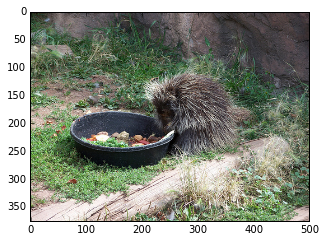

In [3]:
# Choose and display a random image
img_name = np.random.choice(all_images)
img = imread(img_name)
img_height, img_width = img.shape[:2]

mpl.rcParams['figure.figsize'] = (5.0, 5.0 / img_width * img_height)
plt.imshow(img)

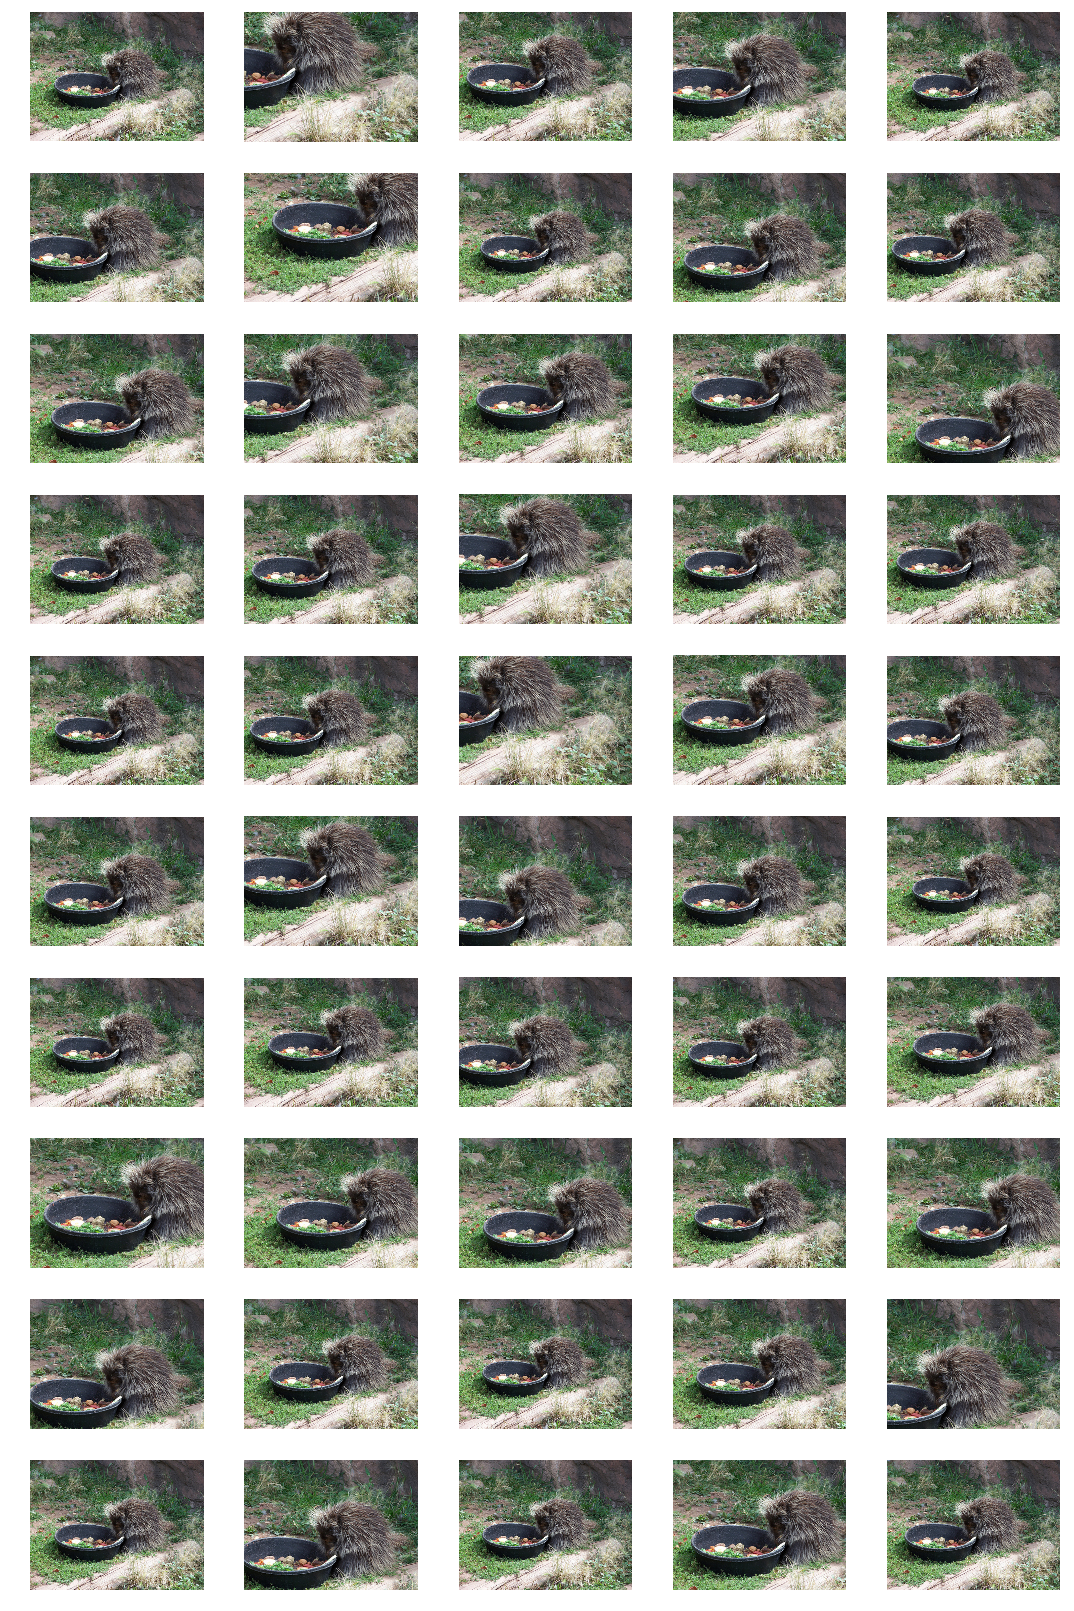

In [4]:
# Random sampling bboxes based on area
AREA_RATIO_RANGE = [0.3, 1.0]
NUM_SAMPLES = 50

DISP_NUM_COLS = 5
DISP_NUM_ROWS = (NUM_SAMPLES + DISP_NUM_COLS - 1) // DISP_NUM_COLS

mpl.rcParams['figure.figsize'] = (
    15.0, 15.0 / DISP_NUM_COLS / img_width * DISP_NUM_ROWS * img_height)

for i in xrange(NUM_SAMPLES):
    area_ratio = np.random.uniform(
        AREA_RATIO_RANGE[0], AREA_RATIO_RANGE[1])
    h, w = img.shape[:2]
    h = int(round(h * np.sqrt(area_ratio)))
    w = int(round(w * np.sqrt(area_ratio)))
    y = np.random.randint(img_height - h + 1)
    x = np.random.randint(img_width - w + 1)
    box = img[y:y+h, x:x+w]
    plt.subplot(DISP_NUM_ROWS, DISP_NUM_COLS, i+1)
    plt.axis('off')
    plt.imshow(box)
plt.tight_layout()

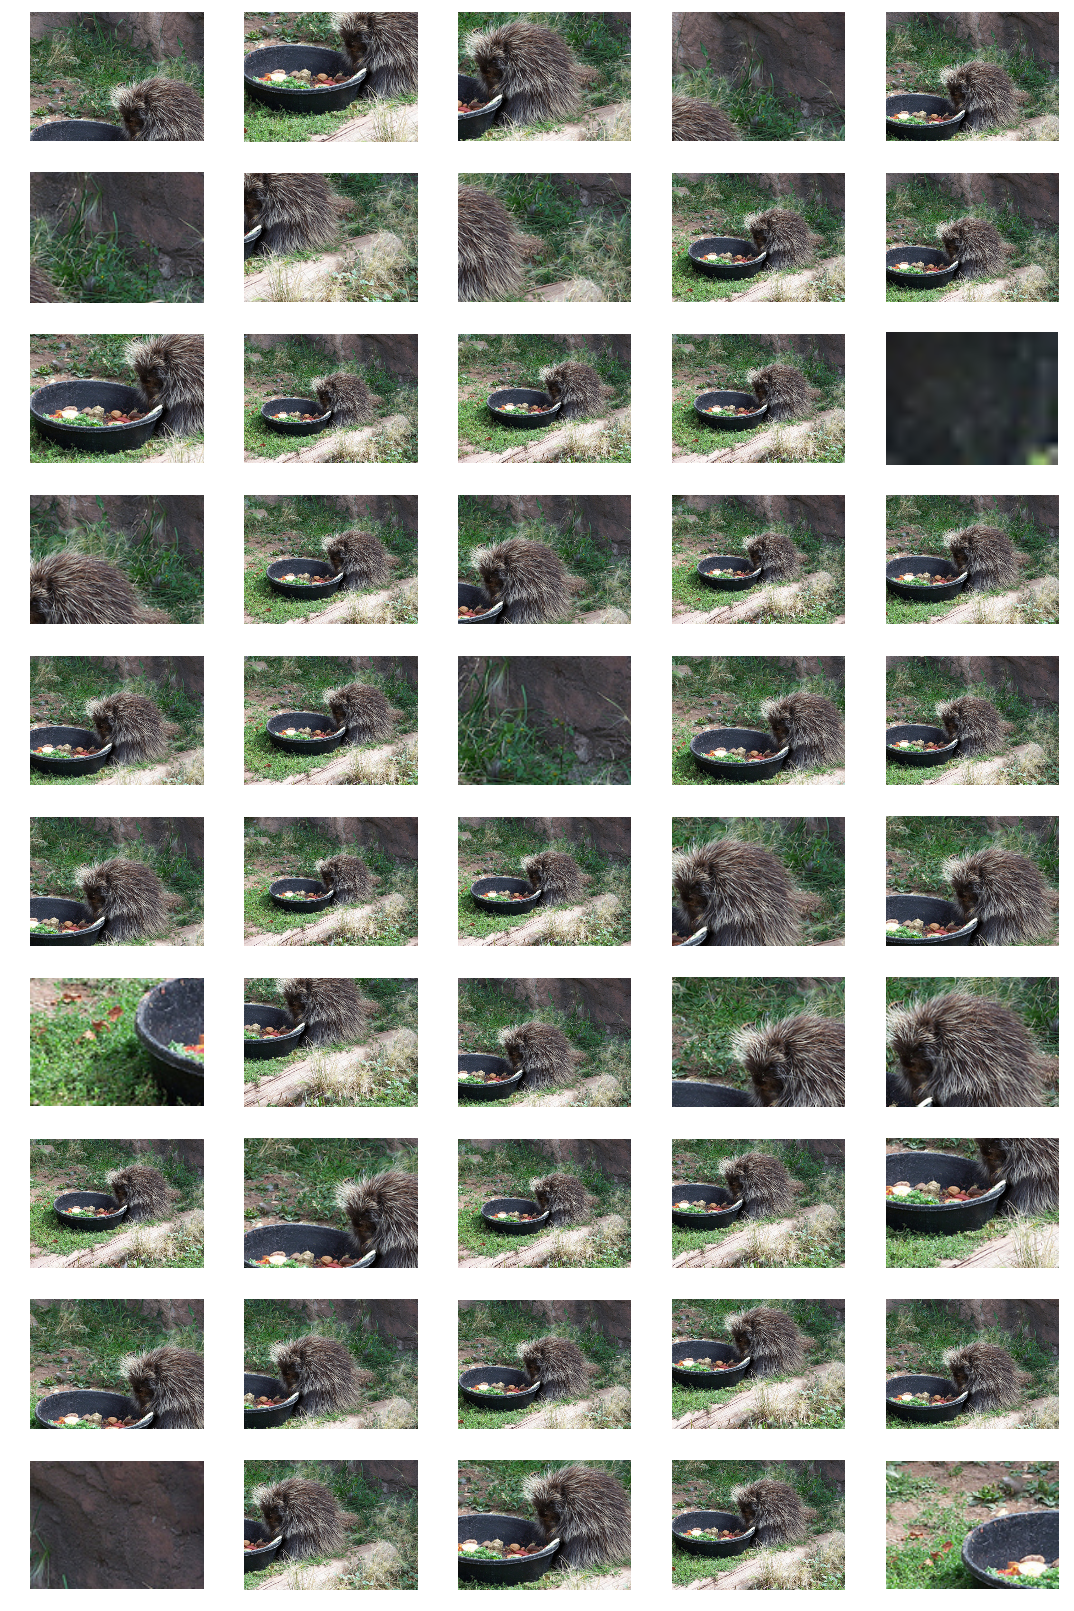

In [5]:
# Random sampling bboxes based on the fitted gaussian
from scipy.stats import norm

MU = 0.7
SIGMA = 0.3
TRANCATED = 0.95
ALPHA = 0.084  # probability for size ratio >= 0.95

NUM_SAMPLES = 50

DISP_NUM_COLS = 5
DISP_NUM_ROWS = (NUM_SAMPLES + DISP_NUM_COLS - 1) // DISP_NUM_COLS

mpl.rcParams['figure.figsize'] = (
    15.0, 15.0 / DISP_NUM_COLS / img_width * DISP_NUM_ROWS * img_height)

s = np.linspace(0.017, TRANCATED, 1000)
ps = norm.pdf(s, MU, SIGMA)
ps = ps / sum(ps)
plt.plot(s, ps)

for i in xrange(NUM_SAMPLES):
    if np.random.rand() < ALPHA: # use the original image
        box = img
    else:
        size_ratio = np.random.choice(s, p=ps)
        h, w = img.shape[:2]
        h = int(round(h * size_ratio))
        w = int(round(w * size_ratio))
        y = np.random.randint(img_height - h + 1)
        x = np.random.randint(img_width - w + 1)
        box = img[y:y+h, x:x+w]
    plt.subplot(DISP_NUM_ROWS, DISP_NUM_COLS, i+1)
    plt.axis('off')
    plt.imshow(box)
plt.tight_layout()